In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import codecs
import pandas as pd

root = '/home/anders/ml/BDA2018_aarhus/data/20161208_onlinedata.txt'

def read_energi_data(f):
    with codecs.open(root,encoding='8859') as f:
        col = []
        l=f.readline().strip()
        while l:
            col.append(' '.join(l.split()[1:]))
            l=f.readline().strip()
        
        dat = pd.read_csv(f,sep=';', skipinitialspace=True,lineterminator ='\n',infer_datetime_format=True)
        dat = dat.drop(dat.columns[-1],1)
        
        dat.columns = [dat.columns[0]] + col
        dat = dat.set_index(dat.columns[0])
    return dat

df = read_energi_data(root)
df

,Centrale kraftværker DK1,Centrale kraftværker DK2,Decentrale kraftværker DK1,Decentrale kraftværker DK2,Vindmøller DK1,Vindmøller DK2,Udveksling Jylland-Norge,Udveksling Jylland-Sverige,Udveksling Jylland-Tyskland,Udveksling Sjælland-Sverige,Udveksling Sjælland-Tyskland,Udveksling Bornholm-Sverige,Udveksling Fyn-Sjaelland,Temperatur i Malling,Vindhastighed i Malling,CO2 udledning,Havmøller DK,Landmøller DK,Solceller DK1,Solceller DK2
Dato og tid,,,,,,,,,,,,,,,,,,,,
2016-12-08 00:00,599,587,270,139,2721,733,-1527,-338,554,-669,113,-18,-381,10,9,190,1060,2394,0,0
2016-12-08 00:05,557,583,271,126,2757,732,-1508,-330,505,-726,247,-17,-318,10,11,184,1058,2430,0,0
2016-12-08 00:10,527,590,241,117,2746,742,-1516,-322,473,-734,304,-19,-256,10,11,180,1061,2427,0,0
2016-12-08 00:15,512,577,213,116,2750,741,-1518,-314,483,-670,304,-18,-193,10,9,175,1060,2431,0,0
2016-12-08 00:20,492,568,198,115,2759,749,-1520,-313,503,-668,304,-18,-192,10,8,170,1060,2448,0,0
2016-12-08 00:25,480,549,198,115,2750,745,-1519,-314,529,-688,304,-18,-230,10,9,166,1063,2431,0,0
2016-12-08 00:30,483,540,198,115,2736,741,-1520,-315,502,-687,304,-19,-231,10,8,166,1060,2418,0,0
2016-12-08 00:35,485,540,195,116,2736,743,-1522,-314,509,-690,304,-19,-231,10,9,166,1063,2416,0,0
2016-12-08 00:40,485,536,194,117,2733,742,-1522,-315,507,-689,304,-18,-231,10,9,165,1061,2415,0,0


In [9]:
import sklearn
from sklearn.decomposition import PCA

model=PCA(n_components=1)
co2 = df["CO2 udledning"] # This is the column we want to compare the others to
df = df.drop(["Havmøller DK", "Landmøller DK", "CO2 udledning", "Temperatur i Malling", "Vindhastighed i Malling"], axis=1)
df

,Centrale kraftværker DK1,Centrale kraftværker DK2,Decentrale kraftværker DK1,Decentrale kraftværker DK2,Vindmøller DK1,Vindmøller DK2,Udveksling Jylland-Norge,Udveksling Jylland-Sverige,Udveksling Jylland-Tyskland,Udveksling Sjælland-Sverige,Udveksling Sjælland-Tyskland,Udveksling Bornholm-Sverige,Udveksling Fyn-Sjaelland,Solceller DK1,Solceller DK2
Dato og tid,,,,,,,,,,,,,,,
2016-12-08 00:00,599,587,270,139,2721,733,-1527,-338,554,-669,113,-18,-381,0,0
2016-12-08 00:05,557,583,271,126,2757,732,-1508,-330,505,-726,247,-17,-318,0,0
2016-12-08 00:10,527,590,241,117,2746,742,-1516,-322,473,-734,304,-19,-256,0,0
2016-12-08 00:15,512,577,213,116,2750,741,-1518,-314,483,-670,304,-18,-193,0,0
2016-12-08 00:20,492,568,198,115,2759,749,-1520,-313,503,-668,304,-18,-192,0,0
2016-12-08 00:25,480,549,198,115,2750,745,-1519,-314,529,-688,304,-18,-230,0,0
2016-12-08 00:30,483,540,198,115,2736,741,-1520,-315,502,-687,304,-19,-231,0,0
2016-12-08 00:35,485,540,195,116,2736,743,-1522,-314,509,-690,304,-19,-231,0,0
2016-12-08 00:40,485,536,194,117,2733,742,-1522,-315,507,-689,304,-18,-231,0,0


In [10]:
transformedModel = model.fit(df).transform(df) # transform() makes the model into a numpy array
print(transformedModel.shape, df.shape) # as we can see in the output, the 15 dimentional dataframe is now reduced to a 1 dimentional data array, making it easier to plot

(288, 1) (288, 15)


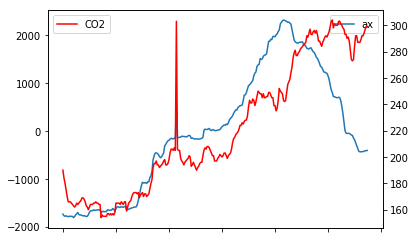

In [11]:
fig,ax = plt.subplots()

ax.plot(transformedModel) #plt.scatter(res[:,0],res[:,1])
ax2 = ax.twinx() #makes the two plots share the x-axis, one has dates and the other has indexing
co2.plot(style="r") #makes the graph red
ax.legend(['ax'])
ax2.legend(['CO2'])
#We can see that early in the day, there is a large correspondance with our dimension and the CO2 emission, later in the day it drops off. this might have something to do with solar


In [12]:
model.explained_variance_ratio_ #Percentage of variance explained by each of the selected components.

array([0.80525662])

In [13]:
np.sort(list(zip(model.components_[0],df.columns)),axis=1)

array([['0.13938924195222674', 'Centrale kraftværker DK1'],
       ['0.012229892263924569', 'Centrale kraftværker DK2'],
       ['0.0678999524955426', 'Decentrale kraftværker DK1'],
       ['0.0166243846851366', 'Decentrale kraftværker DK2'],
       ['-0.44389010483378005', 'Vindmøller DK1'],
       ['-0.0735127849994696', 'Vindmøller DK2'],
       ['0.7747683093031689', 'Udveksling Jylland-Norge'],
       ['-0.09922716629675823', 'Udveksling Jylland-Sverige'],
       ['-0.1772583092112924', 'Udveksling Jylland-Tyskland'],
       ['0.3494690975527129', 'Udveksling Sjælland-Sverige'],
       ['-0.09707495271571143', 'Udveksling Sjælland-Tyskland'],
       ['0.0017965379158941337', 'Udveksling Bornholm-Sverige'],
       ['-0.0017927785883600092', 'Udveksling Fyn-Sjaelland'],
       ['0.0007548212353901084', 'Solceller DK1'],
       ['0.00024648830184538376', 'Solceller DK2']], dtype='<U32')

In [14]:
a = list(zip(model.components_[0],df.columns))
a.sort()
a

[(-0.44389010483378005, 'Vindmøller DK1'),
 (-0.1772583092112924, 'Udveksling Jylland-Tyskland'),
 (-0.09922716629675823, 'Udveksling Jylland-Sverige'),
 (-0.09707495271571143, 'Udveksling Sjælland-Tyskland'),
 (-0.0735127849994696, 'Vindmøller DK2'),
 (-0.0017927785883600092, 'Udveksling Fyn-Sjaelland'),
 (0.00024648830184538376, 'Solceller DK2'),
 (0.0007548212353901084, 'Solceller DK1'),
 (0.0017965379158941337, 'Udveksling Bornholm-Sverige'),
 (0.012229892263924569, 'Centrale kraftværker DK2'),
 (0.0166243846851366, 'Decentrale kraftværker DK2'),
 (0.0678999524955426, 'Decentrale kraftværker DK1'),
 (0.13938924195222674, 'Centrale kraftværker DK1'),
 (0.3494690975527129, 'Udveksling Sjælland-Sverige'),
 (0.7747683093031689, 'Udveksling Jylland-Norge')]